In [1]:
import numpy as np
import pandas as pd
import BasicModel as bm
import statsmodels.tsa as ts
import statsmodels.tsa.stattools as tst
import arch

In [2]:
#获取三个市场的基本数据并做描述性统计
fc = bm.basicmodel()
fc.ret()
fc.ret_data.describe()

,CNY,CNH,NDF
count,2771.000000,2771.000000,2771.000000
mean,0.000038,0.000039,0.000037
std,0.002227,0.002840,0.002767
min,-0.020666,-0.017453,-0.024367
25%,-0.000832,-0.001110,-0.000898
50%,0.000029,0.000016,0.000000
75%,0.000801,0.001158,0.000892
max,0.018574,0.029092,0.041650


In [58]:
#Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test
#lb_test(fc.ret_data['CNY'])
#lb_test(fc.ret_data['CNH'])
lb_test(fc.ret_data['CNY'])

,lb_stat,lb_pvalue
1,17.382372,0.000031
2,21.249854,0.000024
3,25.450369,0.000012
4,26.141254,0.000030
5,30.571429,0.000011
6,35.164108,0.000004
7,35.254759,0.000010
8,35.397318,0.000023
9,36.219950,0.000036
10,39.012224,0.000025


In [26]:
#ADF test
tst.adfuller(fc.ret_data['CNY'])
#tst.adfuller(fc.ret_data['CNH'])
#tst.adfuller(fc.ret_data['NDF'])

(-8.318056298372527,
 3.6352772917215135e-13,
 25,
 2745,
 {'1%': -3.432734490222307,
  '5%': -2.8625934964497826,
  '10%': -2.567330809950863},
 -25708.289659698414)

c:\Users\86177\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


(-0.1, 0.1)

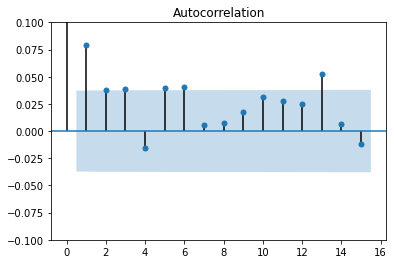

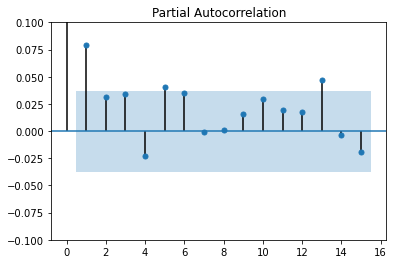

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plot_acf(fc.ret_data['CNY'],lags=15)
plt.ylim([-0.1,0.1])
plot_pacf(fc.ret_data['CNY'],lags=15)
plt.ylim([-0.1,0.1])

In [8]:
#选择ARMA的滞后阶数（函数运行时间较长）
modelchoose = tst.arma_order_select_ic(fc.ret_data['CNY'],max_ar=10,max_ma=10,ic=['aic','bic'])
modelchoose

c:\Users\86177\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\86177\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\86177\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\86177\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\86177\anaconda3\lib\site-packages\statsmodels\base\model

In [28]:
#AR模型
from statsmodels.tsa.ar_model import AutoReg
AR_1_res = AutoReg(fc.ret_data['CNY'],lags =1).fit()
AR_1_res.summary()

c:\Users\86177\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                    CNY   No. Observations:                 2771
Model:                     AutoReg(1)   Log Likelihood               12995.189
Method:               Conditional MLE   S.D. of innovations              0.002
Date:                Thu, 23 Nov 2023   AIC                         -25984.379
Time:                        20:39:11   BIC                         -25966.599
Sample:                             1   HQIC                        -25977.957
                                 2771                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.488e-05   4.22e-05      0.827      0.408   -4.78e-05       0.000
CNY.L1         0.0792      0.019      4.181      0.000       0.042       0.116
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           12.6250           +0.0000j           12.6250            0.0000
-----------------------------------------------------------------------------
"""

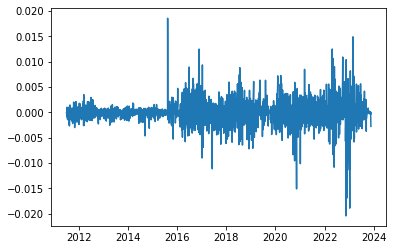

In [8]:
#AR模型的残差作图（体限异方差性）
plt.plot(AR_1_res.resid)

In [9]:
#AR残差做Ljung-Box test
lb_test(AR_1_res.resid)

,lb_stat,lb_pvalue
1,0.017066,0.896063
2,2.257554,0.323429
3,6.189537,0.102744
4,7.564305,0.108907
5,11.678977,0.039461
6,15.592585,0.016116
7,15.603230,0.028999
8,15.685117,0.047115
9,16.257124,0.061702
10,18.512438,0.046911


In [43]:
#AR_GARCH model
am = arch.arch_model(fc.ret_data['CNY'],mean='AR',lags=1,vol='GARCH',p=1,o=0,q=1)
res = am.fit()
res.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -13567.753494171497
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -13567.753485948437
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1


c:\Users\86177\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.927e-06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\86177\anaconda3\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                    CNY   R-squared:                       0.006
Mean Model:                        AR   Adj. R-squared:                  0.006
Vol Model:                      GARCH   Log-Likelihood:                13567.8
Distribution:                  Normal   AIC:                          -27125.5
Method:            Maximum Likelihood   BIC:                          -27095.9
                                        No. Observations:                 2770
Date:                Thu, Nov 23 2023   Df Residuals:                     2768
Time:                        20:49:17   Df Model:                            2
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const      3.4878e-05  4.184e-05      0.834      0.405 [-4.713e-05,1.169e-04]
CNY[1]         0.0792  5.702e-03     13.890  7.267e-44  [6.803e-02,9.038e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      9.8549e-08  1.047e-11   9408.449      0.000 [9.853e-08,9.857e-08]
alpha[1]       0.1000  7.616e-02      1.313      0.189  [-4.927e-02,  0.249]
beta[1]        0.8800  6.930e-02     12.699  5.978e-37     [  0.744,  1.016]
============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Inequality constraints incompatible.
See convergence_flag.

"""

In [67]:
#标准化残差做Ljung-Box test
lb_test(res.std_resid.dropna())

,lb_stat,lb_pvalue
1,0.031385,0.859384
2,2.166755,0.338450
3,5.689853,0.127714
4,5.702869,0.222464
5,6.501633,0.260419
6,7.085920,0.312974
7,7.622438,0.367060
8,7.845740,0.448682
9,8.562794,0.478570
10,9.999023,0.440579
